In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-38-69cfdc8b2108>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa21_data[col].fillna(fifa21_data[col].mean(), inplace=True)
<ipython-input-38-69cfdc8b2108>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

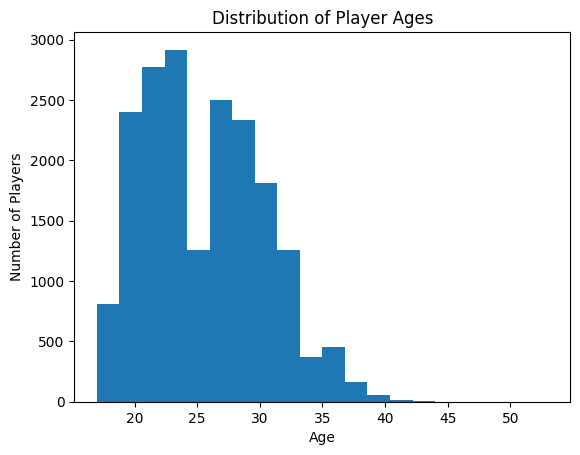

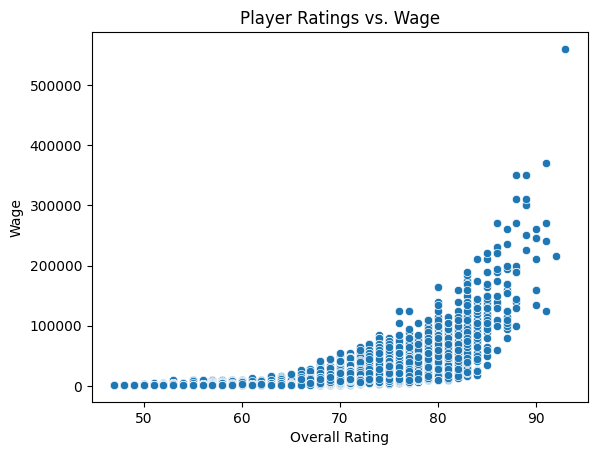

Mean Squared Error: 6.111614595807662e-28
Model Accuracy: 100.0 %


In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

fifa21_data = pd.read_csv("/content/drive/MyDrive/2021.csv")


fifa21_data.drop_duplicates(inplace=True)
for col in fifa21_data.columns:
    if fifa21_data[col].dtype == 'object':
        fifa21_data[col].fillna(fifa21_data[col].mode()[0], inplace=True)
    else:
        fifa21_data[col].fillna(fifa21_data[col].mean(), inplace=True)

plt.hist(fifa21_data['Age'], bins=20)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

sns.scatterplot(x='Overal', y='Wage', data=fifa21_data)
plt.title('Player Ratings vs. Wage')
plt.xlabel('Overall Rating')
plt.ylabel('Wage')
plt.show()

features = ['Overal', 'Potential', 'Age', 'BallControl', 'Dribbling',
            'Vision', 'Composure', 'Crossing', 'ShortPass', 'Acceleration']
target = 'Overal'

X = fifa21_data[features]
y = fifa21_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

performance_threshold = fifa21_data['Overal'].mean()
y_pred_binary = [1 if pred >= performance_threshold else 0 for pred in y_pred]
y_test_binary = [1 if actual >= performance_threshold else 0 for actual in y_test]
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print('Model Accuracy:', accuracy * 100, '%')

In [39]:
columns_to_drop = [
    'ID', 'BirthDate', 'PreferredFoot', 'Nation', 'Nation_Position',
    'Nation_KitNumber', 'Club', 'Club_Position', 'Club_KitNumber',
    'Club_JoinedClub', 'Club_ContractLength', 'Traits', 'Specialities'
]

# Drop the unwanted columns
fifa21_data.drop(columns=columns_to_drop, inplace=True)


fifa21_data.head()


,Name,Natinality,Overal,Potential,Height,Weight,Age,PreferredPositions,PlayerWorkRate,WeakFoot,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,Lionel Messi,Argentina,93,93,170,72,33,RW/ST/CF,Medium/Low,4,...,94,93,94,75,88,14,6,11,15,8
1,Samir Handanovič,Slovenia,88,88,193,92,36,GK,Medium/Medium,3,...,19,12,14,23,12,89,88,85,73,89
2,Toni Kroos,Germany,88,88,183,76,30,CM,Medium/Medium,5,...,86,86,84,73,82,7,10,11,13,10
3,Raheem Sterling,England,88,90,170,69,25,LW/RW,High/Medium,4,...,79,77,63,69,67,15,15,12,12,9
4,Eden Hazard,Belgium,88,88,175,74,29,LW,High/Medium,4,...,78,83,79,87,83,8,11,12,6,8


Mean Squared Error: 6.111614595807662e-28
R-squared Score: 1.0


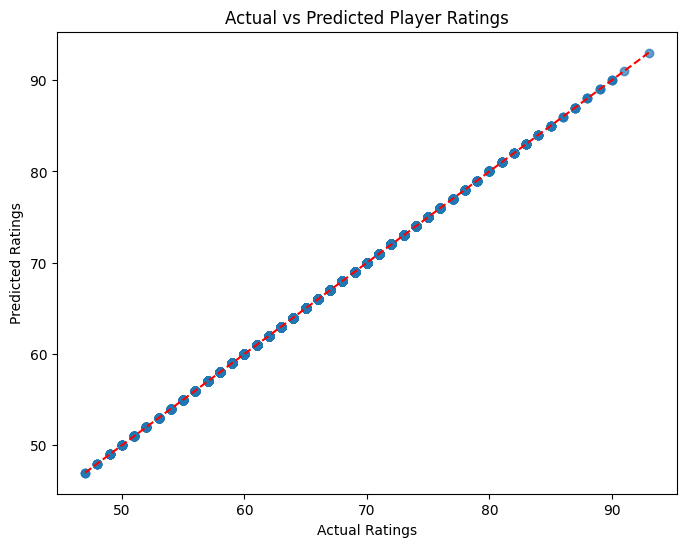

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Player Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()


In [41]:

def categorize_position(position):
    if "GK" in position:
        return "Goalkeeper"
    elif any(pos in position for pos in ["CB", "LB", "RB"]):
        return "Defender"
    elif any(pos in position for pos in ["CM", "CDM", "CAM"]):
        return "Midfielder"
    elif any(pos in position for pos in ["ST", "CF", "LW", "RW"]):
        return "Striker"
    else:
        return "Other"

fifa21_data['Role'] = fifa21_data['PreferredPositions'].apply(categorize_position)

def select_top_11(group):

    group = group[(group['Age'] >= 17) & (group['Age'] <= 40)]
    roles = [
        group[group['Role'] == 'Goalkeeper'].nlargest(1, 'Overal'),
        group[group['Role'] == 'Defender'].nlargest(3, 'Overal'),
        group[group['Role'] == 'Midfielder'].nlargest(4, 'Overal'),
        group[group['Role'] == 'Striker'].nlargest(3, 'Overal'),
    ]
    return pd.concat(roles)

country_teams = fifa21_data.groupby('Natinality').apply(select_top_11).reset_index(drop=True)

Slovenia_team = country_teams[country_teams['Natinality'] == 'Slovenia']
print("Top 11 Players for Slovenia:")
print(Slovenia_team[['Name', 'Role', 'Overal']])


Top 11 Players for Slovenia:
                  Name        Role  Overal
1016         Jan Oblak  Goalkeeper      91
1017       Miha Mevlja    Defender      74
1018       Nejc Skubic    Defender      73
1019  Petar Stojanović    Defender      72
1020       Kevin Kampl  Midfielder      81
1021     Jasmin Kurtić  Midfielder      74
1022         Miha Zajc  Midfielder      73
1023        Jaka Bijol  Midfielder      70
1024      Josip Iličić     Striker      84
1025     Andraž Šporar     Striker      76
1026      Robert Berić     Striker      75


<ipython-input-41-f36f922eb05a>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_teams = fifa21_data.groupby('Natinality').apply(select_top_11).reset_index(drop=True)


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fifa21_data['GoalsScored'] = (
    fifa21_data['Finishing'] * 0.4 +
    fifa21_data['ShotPower'] * 0.3 +
    fifa21_data['Composure'] * 0.2 +
    fifa21_data['AttPosition'] * 0.1
) // 10

features = ['Overal', 'Finishing', 'ShotPower', 'Composure', 'AttPosition', 'LongShots']
target = 'GoalsScored'

fifa21_data.dropna(subset=features, inplace=True)

X = fifa21_data[features]
y = fifa21_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fifa21_data['PredictedGoals'] = model.predict(fifa21_data[features])

top_scorers = fifa21_data[['Name', 'PredictedGoals']].sort_values(by='PredictedGoals', ascending=False).head(10)
print("Top Goal Scorers in Upcoming Match:")
print(top_scorers)


Top Goal Scorers in Upcoming Match:
                     Name  PredictedGoals
19114   Cristiano Ronaldo        8.960096
15             Harry Kane        8.736282
0            Lionel Messi        8.716092
11          Sergio Agüero        8.687276
19110  Robert Lewandowski        8.623292
48            Jamie Vardy        8.495564
35            Luis Suárez        8.450360
41          Ciro Immobile        8.448520
19097      Erling Haaland        8.377674
19106       Kylian Mbappé        8.306471


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

accuracy_percentage = r2 * 100

print(f"Model Accuracy (R-squared): {accuracy_percentage:.2f}%")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Model Accuracy (R-squared): 95.92%
Mean Absolute Error: 0.25
Mean Squared Error: 0.08
